<a href="https://colab.research.google.com/github/vitorinojuliano/Projeto2-Panda/blob/main/projeto2_Juliano_Vitorino_e_Jo%C3%A3o_Felizardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Deep Learning
 * Objetivo: comparar duas arquiteturas diferentes de Redes Neurais Convolucionais (CNNs) na tarefa de classificação de imagens de roupas usando o dataset Fashion-MNIST.

* Arquitetura: CNN (Convolutional Neural Network)
  * CNN Shallow - Uma camada convolucional, porém mais larga.
    * Aprende: Padrões simples e locais (bordas, linhas, cores)
  * CNN Deep - Quatro camadas convolucional, mais especializada.
    * Aprende: Padrões hierárquicos e complexos (texturas -> partes -> objetos inteiros)

In [ ]:
# Importação de Bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Configuração para plots melhores
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


# CÉLULA 2: Carregamento e Exploração do Dataset

In [ ]:
# Carregamento do Dataset Fashion-MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Dimensões dos conjuntos de dados:")
print(f"Images de treino: {train_images.shape}") # (quantidade, altura, largura)
print(f"Rotulo de treino: {train_labels.shape}")
print(f"Images de teste: {test_images.shape}")
print(f"Rotulo de teste: {test_labels.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dimensões dos conjuntos de dados:
Images de treino: (60000, 28, 28)
Rotulo de treino: (60000,)
Images de teste: (10000, 28, 28)
Rotulo de teste: (10000,)


In [ ]:
# Definição dos nomes das classes
class_names = ['Camiseta/Top', 'Calça', 'Pullover', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

print("Classes do Fashion-MNIST:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Classes do Fashion-MNIST:
0: Camiseta/Top
1: Calça
2: Pullover
3: Vestido
4: Casaco
5: Sandália
6: Camisa
7: Tênis
8: Bolsa
9: Bota


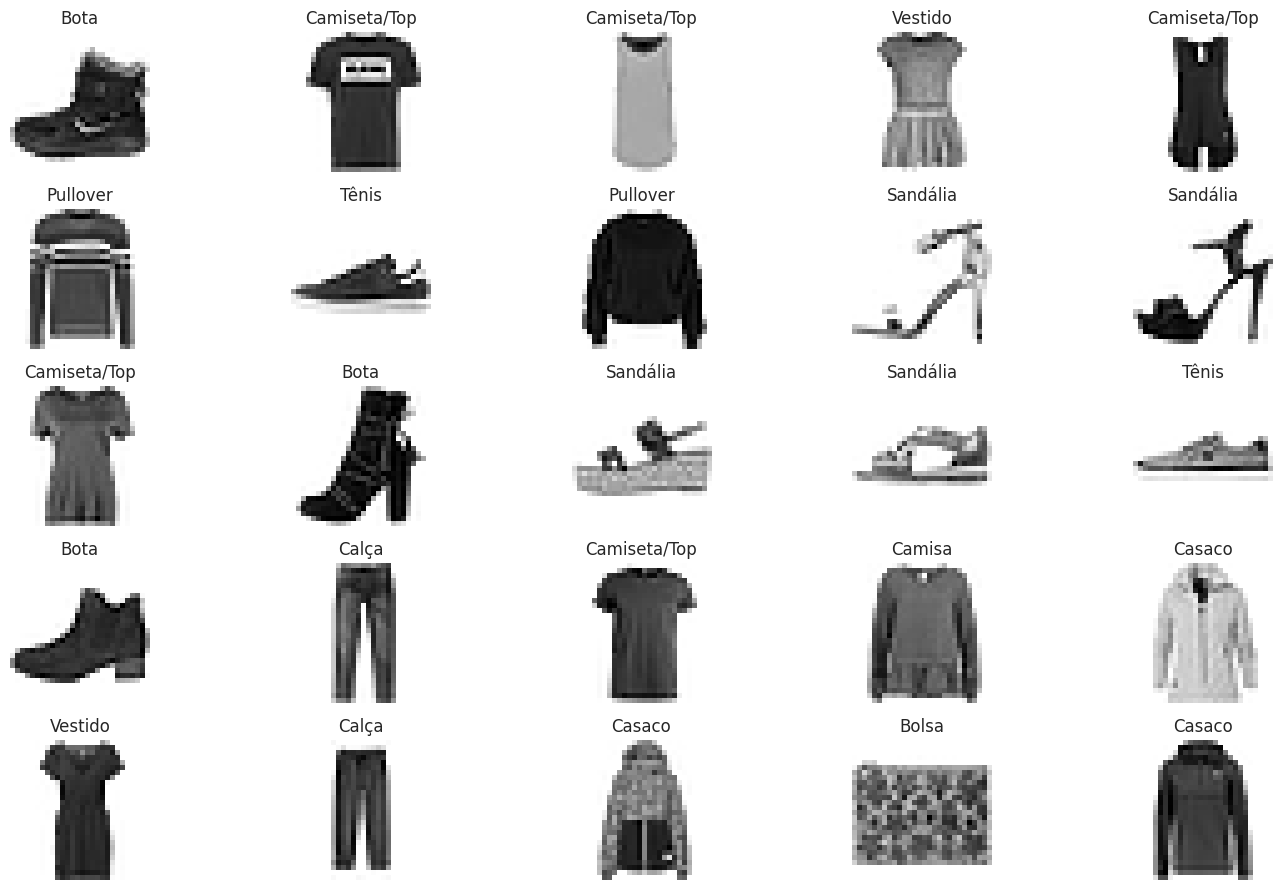

In [ ]:
# Visualização de Amostras do Dataset
plt.figure(figsize=(15, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

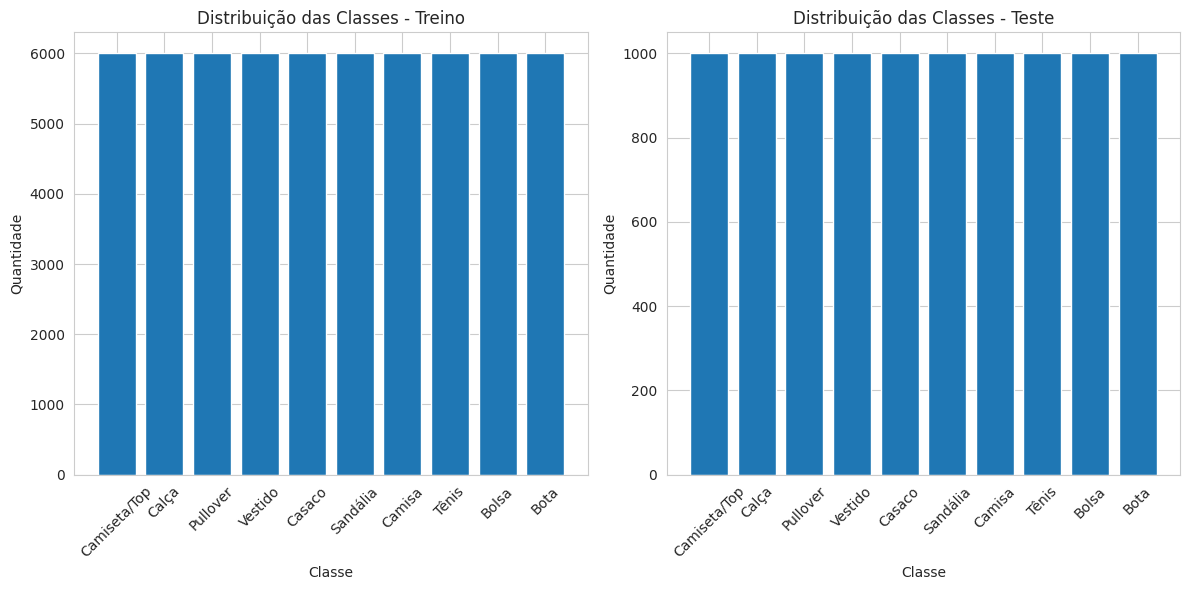

Estatísticas da distribuição:
Treino - Média: 6000, Desvio: 0
Teste - Média: 1000, Desvio: 0


In [ ]:
# Análise da Distribuição das Classes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts)
plt.title('Distribuição das Classes - Treino')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(unique, [class_names[i] for i in unique], rotation=45)

plt.subplot(1, 2, 2)
unique_test, counts_test = np.unique(test_labels, return_counts=True)
plt.bar(unique_test, counts_test)
plt.title('Distribuição das Classes - Teste')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(unique_test, [class_names[i] for i in unique_test], rotation=45)

plt.tight_layout()
plt.show()

print("Estatísticas da distribuição:")
print(f"Treino - Média: {np.mean(counts):.0f}, Desvio: {np.std(counts):.0f}")
print(f"Teste - Média: {np.mean(counts_test):.0f}, Desvio: {np.std(counts_test):.0f}")

Estatísticas dos valores de pixel:
Valor mínimo: 0
Valor máximo: 255
Valor médio: 72.94
Tipo de dados: uint8


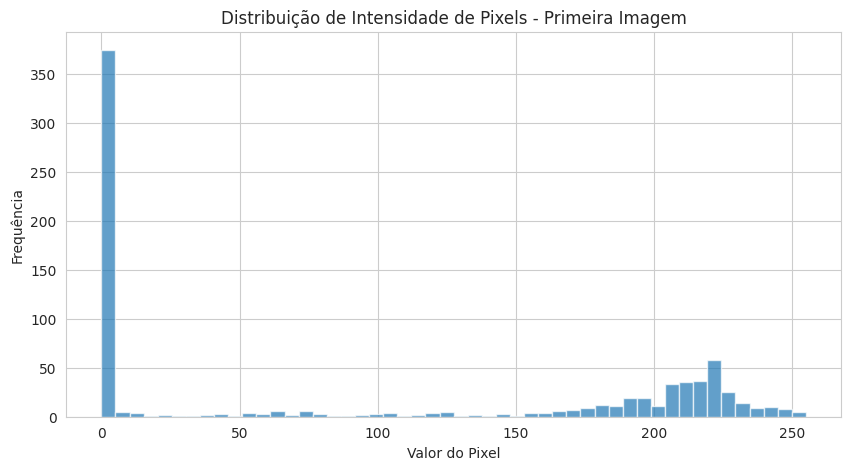

In [ ]:
# Inspeção dos Valores dos Pixels
print("Estatísticas dos valores de pixel:")
print(f"Valor mínimo: {train_images.min()}")
print(f"Valor máximo: {train_images.max()}")
print(f"Valor médio: {train_images.mean():.2f}")
print(f"Tipo de dados: {train_images.dtype}")

# Visualização da distribuição de intensidade
plt.figure(figsize=(10, 5))
plt.hist(train_images[0].flatten(), bins=50, alpha=0.7)
plt.title('Distribuição de Intensidade de Pixels - Primeira Imagem')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.show()

 # CÉLULA 3: Pré-processamento dos Dados

In [ ]:
# Dividindo o Conjunto de Treino em Treino e Validação
from sklearn.model_selection import train_test_split

# Separando 20% do treino para validação
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels,
    test_size=0.2,
    random_state=42,
    # Manter proporção das classes
    stratify=train_labels
)

print("Novas dimensões depois da divisão:")
print(f"Treino: {train_images.shape} - {train_labels.shape}")
print(f"Validação: {val_images.shape} - {val_labels.shape}")
print(f"Teste: {test_images.shape} - {test_labels.shape}")

Novas dimensões depois da divisão:
Treino: (48000, 28, 28) - (48000,)
Validação: (12000, 28, 28) - (12000,)
Teste: (10000, 28, 28) - (10000,)


In [ ]:
# Convertendo para float e normalizando
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("Normalização concluída")
print(f"Novo range - Mínimo: {train_images.min():.3f}, Máximo: {train_images.max():.3f}")
print(f"Novo valor médio: {train_images.mean():.3f}")

Normalização concluída
Novo range - Mínimo: 0.000, Máximo: 1.000
Novo valor médio: 0.286


In [ ]:
# Reformantando imagens para formato compatível com CNN
train_images = train_images.reshape(-1, 28, 28, 1)  # (48000, 28, 28, 1)
val_images = val_images.reshape(-1, 28, 28, 1)      # (12000, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)    # (10000, 28, 28, 1)

print("Reformatação concluída!")
print(f"Novos formatos:")
print(f"Treino: {train_images.shape}")
print(f"Validação: {val_images.shape}")
print(f"Teste: {test_images.shape}")

Reformatação concluída!
Novos formatos:
Treino: (48000, 28, 28, 1)
Validação: (12000, 28, 28, 1)
Teste: (10000, 28, 28, 1)


In [ ]:
# Conversão dos Labels para One-Hot Encoding
from tensorflow.keras.utils import to_categorical

train_labels_categorical = to_categorical(train_labels, 10)
val_labels_categorical = to_categorical(val_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

print("Conversão concluída!")
print(f"Exemplo de conversão: Label {train_labels[0]} -> {train_labels_categorical[0]}")

Conversão concluída!
Exemplo de conversão: Label 6 -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


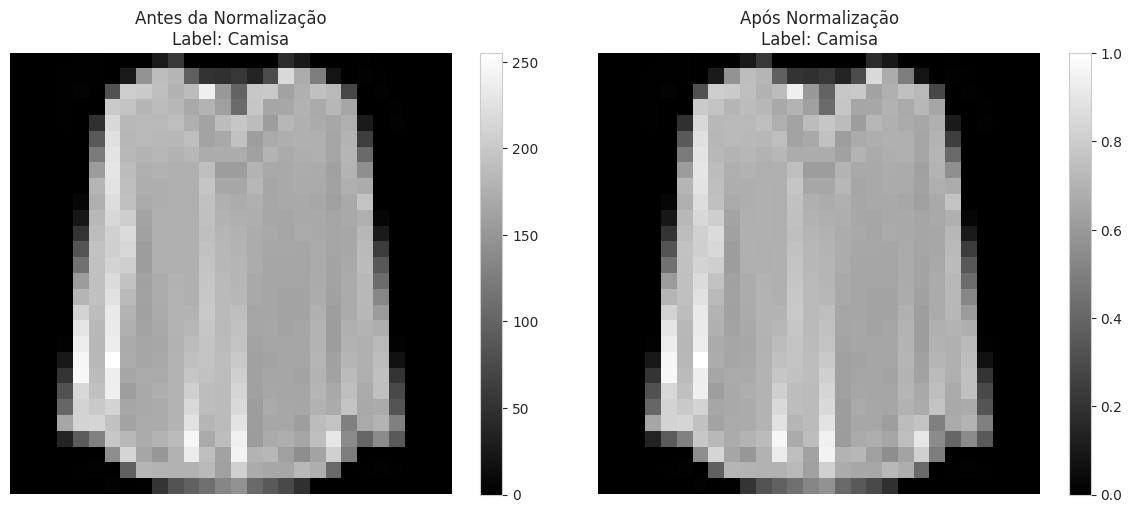

In [ ]:
train_images_original = train_images * 255.0  # reescalonando de volta para 0–255 só para visualização

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images_original[0].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
plt.title(f'Antes da Normalização\nLabel: {class_names[train_labels[0]]}')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(train_images[0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title(f'Após Normalização\nLabel: {class_names[train_labels[0]]}')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()


# CÉLULA 4: Definição do Modelo A - CNN Shallow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_shallow = Sequential(name='CNN_Shallow')

# Camada Convolucional Única
model_shallow.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1),
                        name='conv2d_32_filters'))
model_shallow.add(MaxPooling2D((2, 2), name='max_pooling_2d'))

# Camada de Achatamento
model_shallow.add(Flatten(name='flatten'))

# Camada Dense Moderada (REDUZIDA de 256 para 128)
model_shallow.add(Dense(128, activation='relu', name='dense_128'))
model_shallow.add(Dropout(0.3, name='dropout_30percent'))

# Camada de Saída CORRIGIDA (10 classes, não 16!)
model_shallow.add(Dense(10, activation='softmax', name='output_softmax'))

print(" Modelo construído com sucesso!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Modelo construído com sucesso!


In [ ]:
print("Resumo do CNN Shallow")
print("=" * 50)
model_shallow.summary()

Resumo do CNN Shallow


Model: "CNN_Shallow"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32_filters (Conv2D)      │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30percent (Dropout)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
total_params = model_shallow.count_params()
print(f"\nTotal de parâmetros treináveis: {total_params:,}")


Total de parâmetros treináveis: 693,962


In [ ]:
# Verificação final da estrutura
print(f"\n Modelo '{model_shallow.name}' pronto para compilação!")
print(f"   Input shape: {model_shallow.input_shape}")
print(f"   Output shape: {model_shallow.output_shape}")
print(f"   Número de camadas: {len(model_shallow.layers)}")


 Modelo 'CNN_Shallow' pronto para compilação!
   Input shape: (None, 28, 28, 1)
   Output shape: (None, 10)
   Número de camadas: 6


# CÉLULA 5: Definição do Modelo B - CNN Deep

In [ ]:

model_deep_fast = Sequential(name='CNN_Deep_Fast')

# Bloco 1
model_deep_fast.add(Conv2D(32, (3, 3), activation='relu',
                          input_shape=(28, 28, 1),
                          padding='same',
                          name='conv2d_1'))
model_deep_fast.add(MaxPooling2D((2, 2), name='pooling_1'))
model_deep_fast.add(Dropout(0.25))

# Bloco 2
model_deep_fast.add(Conv2D(64, (3, 3), activation='relu',
                          padding='same',
                          name='conv2d_2'))
model_deep_fast.add(MaxPooling2D((2, 2), name='pooling_2'))
model_deep_fast.add(Dropout(0.25))

# Bloco 3 - Filtros maiores, SEM pooling extra
model_deep_fast.add(Conv2D(128, (3, 3), activation='relu',
                          padding='valid',
                          name='conv2d_3'))
model_deep_fast.add(Dropout(0.25))

# Flatten com dimensões controladas
model_deep_fast.add(Flatten())

# Camadas Densas moderadas
model_deep_fast.add(Dense(256, activation='relu'))
model_deep_fast.add(Dropout(0.5))
model_deep_fast.add(Dense(10, activation='softmax'))

model_deep_fast.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Modelo Deep construído e compilado!")

Modelo Deep construído e compilado!


In [ ]:
print("RESUMO DA ARQUITETURA - MODELO DEEP")
print("=" * 50)
model_deep_fast.summary()

RESUMO DA ARQUITETURA - MODELO DEEP


Model: "CNN_Deep_Fast"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914,698 (3.49 MB)

 Trainable params: 914,698 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
total_params_deep = model_deep_fast.count_params()
print(f"\nTotal de parâmetros treináveis: {total_params_deep:,}")

print(f"Comparação com Modelo Shallow:")
print(f"   • Modelo Shallow: {model_shallow.count_params():,} parâmetros")
print(f"   • Modelo Deep:    {total_params_deep:,} parâmetros")
print(f"   • Diferença:      {total_params_deep - model_shallow.count_params():,} parâmetros")


Total de parâmetros treináveis: 914,698
Comparação com Modelo Shallow:
   • Modelo Shallow: 693,962 parâmetros
   • Modelo Deep:    914,698 parâmetros
   • Diferença:      220,736 parâmetros


In [ ]:

print(f"\nModelo '{model_deep_fast.name}' pronto para compilação!")
print(f"   Input shape: {model_deep_fast.input_shape}")
print(f"   Output shape: {model_deep_fast.output_shape}")
print(f"   Número total de camadas: {len(model_deep_fast.layers)}")
print(f"   Camadas convolucionais: 4")
print(f"   Blocos convolucionais: 2")


Modelo 'CNN_Deep_Fast' pronto para compilação!
   Input shape: (None, 28, 28, 1)
   Output shape: (None, 10)
   Número total de camadas: 12
   Camadas convolucionais: 4
   Blocos convolucionais: 2


# CÉLULA 6: Compilação e Treinamento dos Modelos




In [ ]:
# Configurações para compilação
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# Compilação do Modelo Shallow
model_shallow.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print("Modelo Shallow compilado")

# Compilação do Modelo Deep
model_deep_fast.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print("Modelo Deep compilado")


Modelo Shallow compilado
Modelo Deep compilado


In [ ]:
# Configurações de Treinamento
epochs = 20
batch_size = 64
validation_data = (val_images, val_labels_categorical)

print(f"   Épocas: {epochs}")
print(f"   tamanho do lote: {batch_size}")
print(f"   Dados de validação: {val_images.shape[0]} amostras")

# Retorno de chamada para parada antecipada
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=0
)

   Épocas: 20
   tamanho do lote: 64
   Dados de validação: 12000 amostras


In [ ]:
# Treinamento do Modelo Shallow
import time

start_time = time.time()

history_shallow = model_shallow.fit(
    train_images, train_labels_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_data,
    callbacks=[early_stopping],
    verbose=1
)

shallow_training_time = time.time() - start_time
print(f"Treinamento Shallow concluído em {shallow_training_time:.2f} segundos")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7637 - loss: 0.6829 - val_accuracy: 0.8845 - val_loss: 0.3253
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8834 - loss: 0.3296 - val_accuracy: 0.8992 - val_loss: 0.2760
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8990 - loss: 0.2837 - val_accuracy: 0.9051 - val_loss: 0.2584
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9065 - loss: 0.2581 - val_accuracy: 0.9118 - val_loss: 0.2460
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9160 - loss: 0.2281 - val_accuracy: 0.9119 - val_loss: 0.2408
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9237 - loss: 0.2048 - val_accuracy: 0.9086 - val_loss: 0.2491
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9273 - loss: 0.1958 - val_accuracy: 0.9192 - val_loss: 0.2275
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9331 - loss: 0.1794 - val_accuracy: 0.

In [ ]:
# Treinamento do Modelo Deep
start_time = time.time()

history_deep = model_deep_fast.fit(
    train_images, train_labels_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_data,
    callbacks=[early_stopping],
    verbose=1
)

deep_training_time = time.time() - start_time
print(f"Treinamento Deep concluído em {deep_training_time:.2f} segundos")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6946 - loss: 0.8297 - val_accuracy: 0.8750 - val_loss: 0.3409
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8560 - loss: 0.3931 - val_accuracy: 0.8897 - val_loss: 0.2972
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8829 - loss: 0.3269 - val_accuracy: 0.9016 - val_loss: 0.2678
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8939 - loss: 0.2975 - val_accuracy: 0.9100 - val_loss: 0.2389
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8983 - loss: 0.2784 - val_accuracy: 0.9127 - val_loss: 0.2356
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9067 - loss: 0.2559 - val_accuracy: 0.9191 - val_loss: 0.2227
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9083 - loss: 0.2472 - val_accuracy: 0.9208 - val_loss: 0.2169
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9127 - loss: 0.2360 - val_accuracy: 0

In [ ]:
# Verifique isso IMEDIATAMENTE:
import tensorflow as tf
print("🔍 DIAGNÓSTICO DE PERFORMANCE:")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponível: {tf.config.list_physical_devices('GPU')}")
print(f"CPU threads: {tf.config.threading.get_inter_op_parallelism_threads()}")

🔍 DIAGNÓSTICO DE PERFORMANCE:
TensorFlow version: 2.19.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU threads: 0


# CÉLULA 6.5: Resultados Finais do Treinamento

In [ ]:
print("\n AVALIAÇÃO NO CONJUNTO DE TESTE:")

# Shallow
test_loss_shallow, test_acc_shallow = model_shallow.evaluate(test_images, test_labels_categorical, verbose=0)
print(f" SHALLOW - Teste:")
print(f"   • Acurácia: {test_acc_shallow:.4f} ({test_acc_shallow*100:.2f}%)")
print(f"   • Loss: {test_loss_shallow:.4f}")

# Deep
test_loss_deep, test_acc_deep = model_deep_fast.evaluate(test_images, test_labels_categorical, verbose=0)
print(f" DEEP - Teste:")
print(f"   • Acurácia: {test_acc_deep:.4f} ({test_acc_deep*100:.2f}%)")
print(f"   • Loss: {test_loss_deep:.4f}")

print(f"\n COMPARAÇÃO FINAL:")
print(f"   • Diferença de Acurácia: {test_acc_deep - test_acc_shallow:+.4f}")
print(f"   • Melhor Modelo: {'DEEP' if test_acc_deep > test_acc_shallow else 'SHALLOW'}")
print(f"   • Vantagem: {abs(test_acc_deep - test_acc_shallow)*100:.2f}%")


 AVALIAÇÃO NO CONJUNTO DE TESTE:
 SHALLOW - Teste:
   • Acurácia: 0.9151 (91.51%)
   • Loss: 0.2450
 DEEP - Teste:
   • Acurácia: 0.9238 (92.38%)
   • Loss: 0.2162

 COMPARAÇÃO FINAL:
   • Diferença de Acurácia: +0.0087
   • Melhor Modelo: DEEP
   • Vantagem: 0.87%



## 📊 Registro do Histórico e Análise Comparativa

Após o treinamento, salvamos os históricos de aprendizado (acurácia e perda por época)
para permitir uma análise mais detalhada entre os modelos. Também geramos uma tabela comparativa
e um gráfico para visualizar a evolução do desempenho.


         modelo  accuracy  val_accuracy      loss  val_loss
9   CNN Shallow  0.940521      0.924167  0.160076  0.228946
18     CNN Deep  0.933062      0.930917  0.177260  0.200313


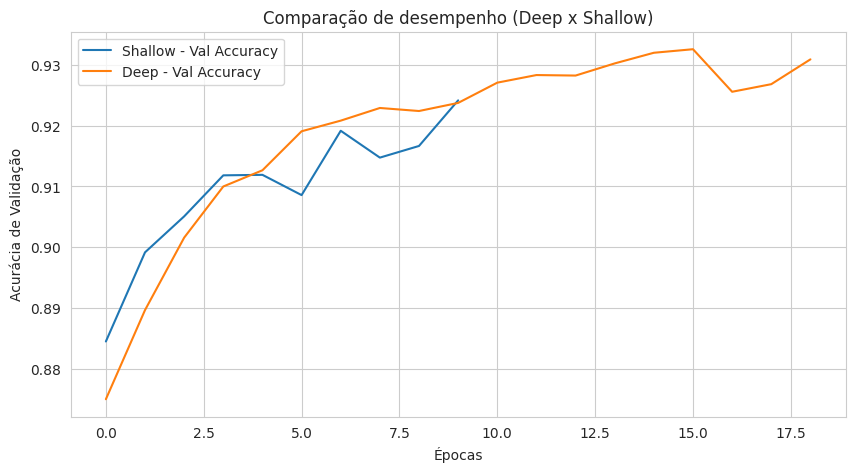

In [ ]:

# Histórico de cada modelo
hist_shallow_df = pd.DataFrame(history_shallow.history)
hist_deep_df = pd.DataFrame(history_deep.history)

# Adicionar identificação
hist_shallow_df['modelo'] = 'CNN Shallow'
hist_deep_df['modelo'] = 'CNN Deep'

# Concatenar os históricos
hist_total = pd.concat([hist_shallow_df, hist_deep_df])

# Salvar como CSV
hist_total.to_csv('historico_treino.csv', index=False)

# Tabela comparativa final
comparativo = hist_total.groupby('modelo').tail(1)[['modelo', 'accuracy', 'val_accuracy', 'loss', 'val_loss']]
print(comparativo)

# Gráfico comparativo
plt.figure(figsize=(10,5))
plt.plot(history_shallow.history['val_accuracy'], label='Shallow - Val Accuracy')
plt.plot(history_deep.history['val_accuracy'], label='Deep - Val Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia de Validação')
plt.title('Comparação de desempenho (Deep x Shallow)')
plt.legend()
plt.show()